In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

### Example 3.2: spline interpolation of the Runge function

Study interpolation by means of cubic splines of the Runge function:

$$f(x)=\frac{1}{1+25 x^2}$$

on the interval [-1,1] using $N=10,\cdots,15$ intervals ($N+1$ points).

**Hint:** to solve the system of equations for the second derivatives, take into account that the linalg module of the numpy package includes the function inv, which computes the inverse of a matrix.

---


In [2]:
def f(x):
    return 1/(1 + 25*x**2)

def spline(x, N):
    xp = np.linspace(-1, 1, N+1)
    fp = f(xp)
    mu, nu, lam = np.zeros([N+1], float), np.zeros([N+1], float), np.zeros([N+1], float)
    M = np.zeros([N+1, N+1], float)
    s2 = np.zeros([N+1], float)
    for i in range(1, N):
        mu[i] = (xp[i+1] - xp[i])/(xp[i+1] - xp[i-1])
        nu[i] = (xp[i] - xp[i-1])/(xp[i+1] - xp[i-1])
        lam[i] = 6/(xp[i+1] - xp[i-1])*((fp[i+1] - fp[i])/(xp[i+1] - xp[i]) - (fp[i] - fp[i-1])/(xp[i] - xp[i-1]))

        M[i, i-1] = mu[i]
        M[i, i] = 2
        M[i, i+1] = nu[i]

    M[0, 0], M[N, N] = 2, 2

    s2 = np.dot(inv(M), lam)
    A0, A1, A2, A3 = np.zeros([N], float), np.zeros([N], float), np.zeros([N], float), np.zeros([N], float)

    for i in range(N):
        A0[i] = fp[i]
        A1[i] = (fp[i+1] - fp[i]) / (xp[i+1] - xp[i]) - (xp[i+1] - xp[i])*(s2[i+1] + 2*s2[i])/6
        A2[i] = s2[i]/2
        A3[i] = (s2[i+1] - s2[i])/(6*(xp[i+1] - xp[i]))
        i = 0
    while x > xp[i+1]:
        i+=1
    return A0[i] + A1[i] * (x - xp[i]) + A2[i]*(x - xp[i])**2 + A3[i]*(x - xp[i])**3

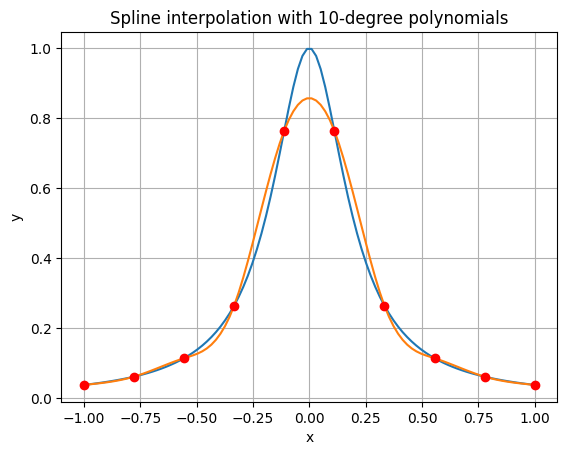

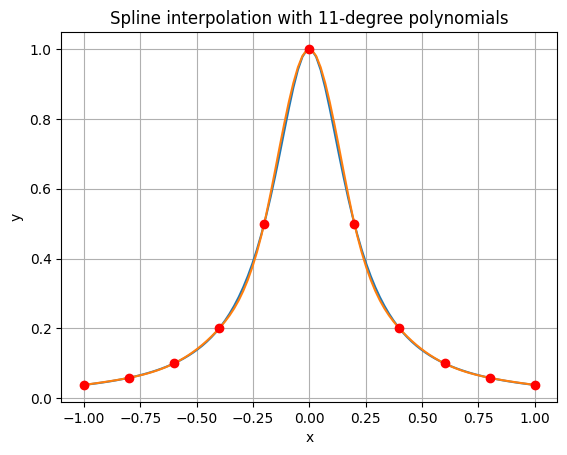

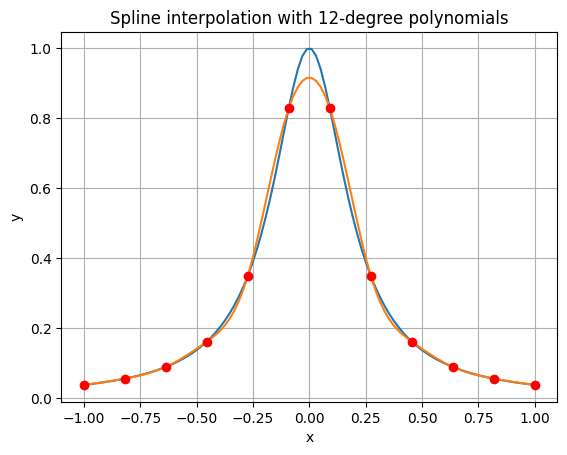

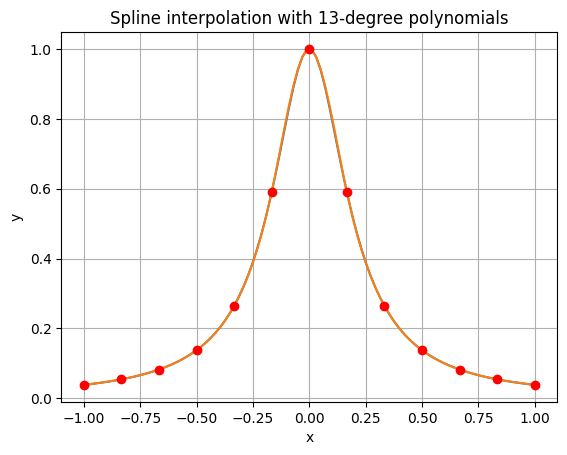

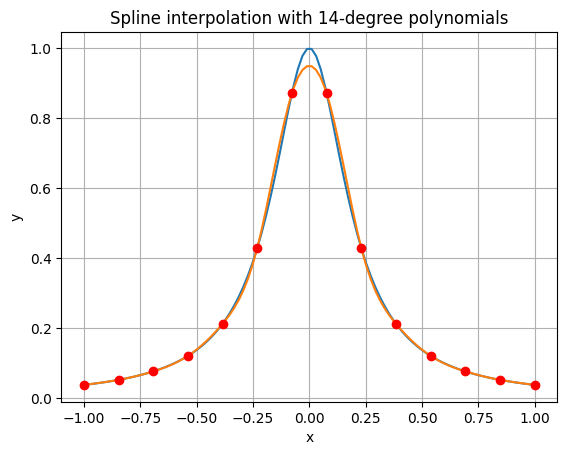

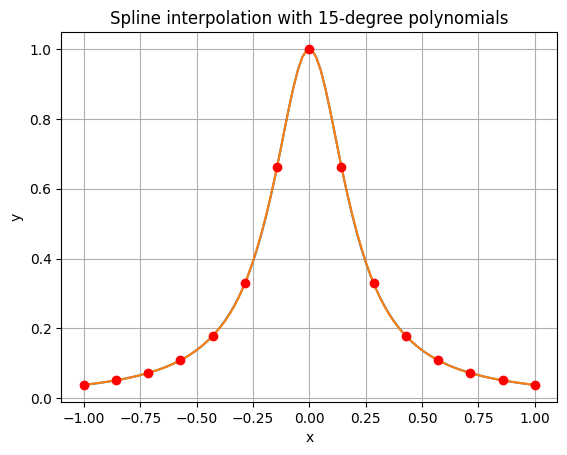

In [3]:
x = np.linspace(-1, 1, 100)
for N in range(10, 16):
    xp = np.linspace(-1, 1, N)
    fp = f(xp)
    fs = [spline(a, N-1) for a in x]

    plt.plot(x, f(x))
    plt.plot(x, fs)
    plt.plot(xp, fp, 'ro')
    plt.grid()
    plt.title(f"Spline interpolation with {N}-degree polynomials")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()